# Data preprocess

In [ ]:
"""
generate train data, validation data, and test data
"""
import os
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.ndimage import imread
from scipy.misc import imsave
import numpy as np
import os
from numpy import genfromtxt
import tensorflow as tf
from PIL import Image
import pickle

In [ ]:
def generate_data_list(path, subjects):
    """
    生成每个subject的所有图片
    """
    for subject in subjects:
        subject_path = os.path.join(path, subject)
        images = os.listdir(subject_path)
        yield (images, subject)

In [ ]:
def generate_degree_list(gallery_path, images):
    """
    生成每个subject的四个不同的degree的图片, 列在一起 
    """
    list_55 = []
    list_65 = []
    list_75 = []
    list_85 = []
    for image in images[0]:
        image_path = os.path.join(gallery_path, images[1], image)
        if image[-6:] == '55.png':
            list_55.append(imread(image_path))
        elif image[-6:] == '65.png':
            list_65.append(imread(image_path))
        elif image[-6:] == '75.png':
            list_75.append(imread(image_path))
        elif image[-6:] == '85.png':
            list_85.append(imread(image_path))
    list_total = [list_55, list_65, list_75, list_85]
    
    return list_total

In [ ]:
def generate_subject_list(subjects, gallery_path, subject_iteration):
    """
    生成一个list, 包含所有subjects的images 
    """
    subject_list = []
    for subject in subjects:
        list_total = generate_degree_list(gallery_path, next(subject_iteration))
        subject_list.append(list_total)
    return subject_list

# Get dataset

In [31]:
# gallery path
gallery_path = 'OULP-C1V2_Pack/OULP-deference-(128x88)/Seq00'

# get all subjects
subjects = os.listdir(gallery_path)
subjects = subjects[1:] 

# 得到iteration
y = generate_data_list(gallery_path, subjects)

subject_list = generate_subject_list(subjects, gallery_path, y)

OSError: [Errno 22] Invalid argument

In [ ]:
subject_list = np.array(subject_list)

In [54]:
with open('preprocess_1.p', 'wb') as out_file:
#     pickle.dump((subject_list), out_file)
    for each in subject_list:
        np.save(out_file, each)

In [76]:
gallery_path_2 = 'OULP-C1V2_Pack/OULP-deference-(224x224)/Seq01'

subjects = os.listdir(gallery_path_2)
subjects = subjects[1:] 

y2 = generate_data_list(gallery_path_2, subjects)

subject_list_2 = generate_subject_list(subjects, gallery_path_2, y2)

In [78]:
subject_list_2 = np.array(subject_list_2)
subject_list_2[0][3][5]

array([[128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       ..., 
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128]], dtype=uint8)

In [80]:
with open('gait_data/preprocess_3.p', 'wb') as jj:
#     for each in subject_list_2:
#         pickle.dump(each, out_file)
    for each in subject_list_2:
        np.save(jj, each)

(128, 88)

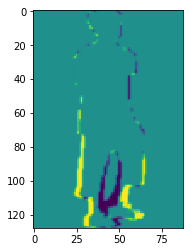

In [145]:
plt.imshow(subject_list[0][0][0])
subject_list[0][0][0].shape

In [22]:
def get_subject_batches(ii, subject):
    """
    yield every batch inside of one subject
    """
    if ii == 0:
        out_batch = subject[:15]
    else:
        out_batch = subject[ii + 14]
    yield out_batch
             
subject = [i for i in range(1,31)]
print(subject)

for ii in range(len(subject) - 14):
    x = get_subject_batches(ii, subject)
    print(next(x))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
